# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
import os
import cv2
import numpy as np

# Set the train-test split ratio
trainAmt = 0.9

# Initialize lists to store images and labels
trainFaces = []
testFaces = []
trainLabels = []
testLabels = []

# Loop through each subject directory (from 1 to 40)
for i in range(1, 41):
    # Initialize a counter to keep track of the number of images per subject
    image_count = 0

    # Loop through each image (from 1 to 10) for the current subject
    for j in range(1, 11):
        # Load the image
        imgPath = os.path.join("/content/drive/MyDrive/SMAI Assignment 2/2021101127_A2/rollnumber_A2_Q3/ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        # Append the image to the list of all faces
        if image_count == 0:
            testFaces.append(img)
            testLabels.append(i)
        else:
            trainFaces.append(img)
            trainLabels.append(i)

        # Increment the counter
        image_count += 1

# Convert the lists to NumPy arrays
trainFaces = np.array(trainFaces)
testFaces = np.array(testFaces)
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)

# Shuffle the data
randomOrder = np.random.permutation(len(trainLabels))
trainFaces = trainFaces[randomOrder]
trainLabels = trainLabels[randomOrder]

randomOrder = np.random.permutation(len(testLabels))
testFaces = testFaces[randomOrder]
testLabels = testLabels[randomOrder]

# Print the shape of the train and test datasets
print("Train dataset shape:", trainFaces.shape, trainLabels.shape)
print("Test dataset shape:", testFaces.shape, testLabels.shape)


Train dataset shape: (360, 112, 92) (360,)
Test dataset shape: (40, 112, 92) (40,)


In [3]:
# flat_trainFaces = trainFaces.flatten();
flat_trainFaces = trainFaces.reshape(trainFaces.shape[0], -1)
flat_testFaces = testFaces.reshape(testFaces.shape[0],-1)

print(flat_trainFaces.shape)
print(flat_testFaces.shape)


(360, 10304)
(40, 10304)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [4]:
def principalComponentAnalysis(X, numComponents):
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """

    # your code here

    X_normalized = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)   # normalized the data
    X_mean = np.mean(X,axis = 0)

    cov_mat = np.cov(X_normalized,rowvar=False)       # Calculate the covariance matrix

    eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)  # find the eigen values and eigen vectors

    idx = eigenvalues.argsort()[::-1]  # Sort the eigenvalues in decreasing order .
    eigenvectors = eigenvectors[:, idx]  #  Correspondingly we rearrange the eigne vectors.

    # Choose the top k eigenvectors (principal components)
    principal_components = eigenvectors[:, :numComponents]

    return X_mean,principal_components


In [5]:
meanfaces, p_components = principalComponentAnalysis(flat_trainFaces, 10304)

In [ ]:
# meanfaces_for_zero, one_component = principalComponentAnalysis(flat_trainFaces, 1)

In [ ]:
# print(meanfaces_for_zero.shape)
# print(one_component.shape)

(10304, 10304)


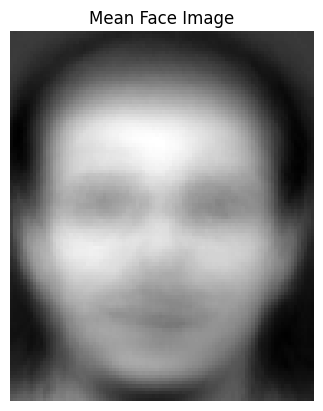

In [6]:
# projectin in the eigen vectors
# dot product

projection_data = np.dot(flat_trainFaces, p_components)
print(p_components.shape)
meanfaces_reshape = meanfaces.reshape([112,92])

plt.imshow(meanfaces_reshape, cmap='gray')
plt.axis('off')
plt.title('Mean Face Image')
plt.show()



In [7]:
# plot the eigen faces
%matplotlib inline

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [8]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """

    # your code here

    # Center the test face by subtracting the mean face
    centered_test_face = testFace - meanFace

    # Project the centered test face onto the eigenfaces to obtain the coefficients of the projection
    coefficients = np.dot(centered_test_face, eigenFaces)

    # Reconstruct the face using the eigenfaces and the coefficients of the projection
    reconstructed_face = np.dot(coefficients, eigenFaces.T) + meanFace

    return reconstructed_face.astype(np.float64)


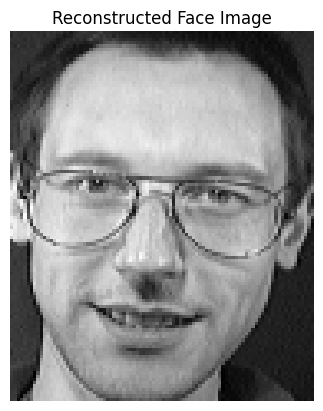

In [9]:
reconstructed_img = imageReconstruction(flat_testFaces[0],p_components,meanfaces )
# print(type(reconstructed_img[0]))
meanfaces_reshape = reconstructed_img.reshape([112,92])

# plt.imshow()
plt.imshow(meanfaces_reshape, cmap='gray')
plt.axis('off')
plt.title('Reconstructed Face Image')
plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

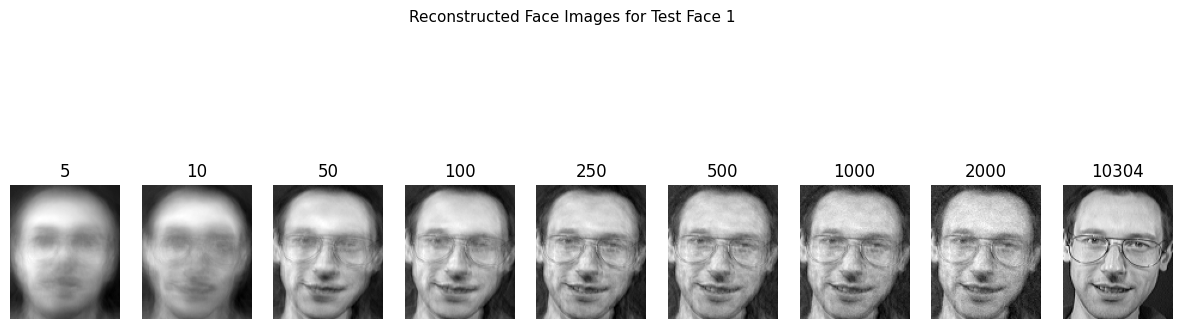

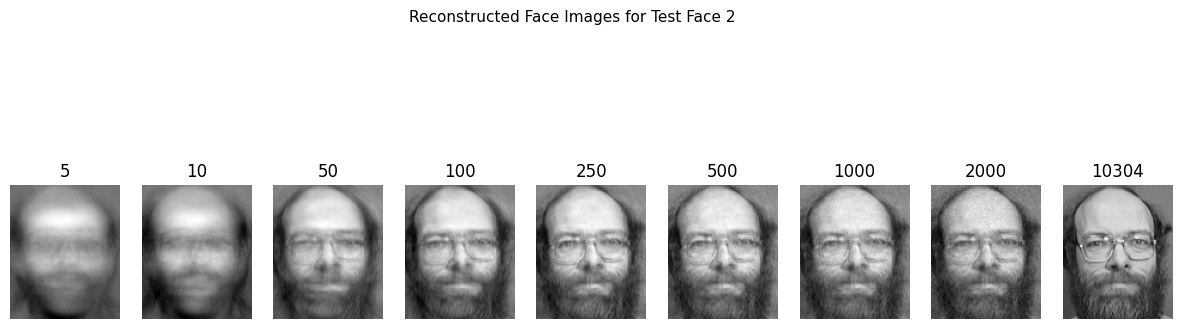

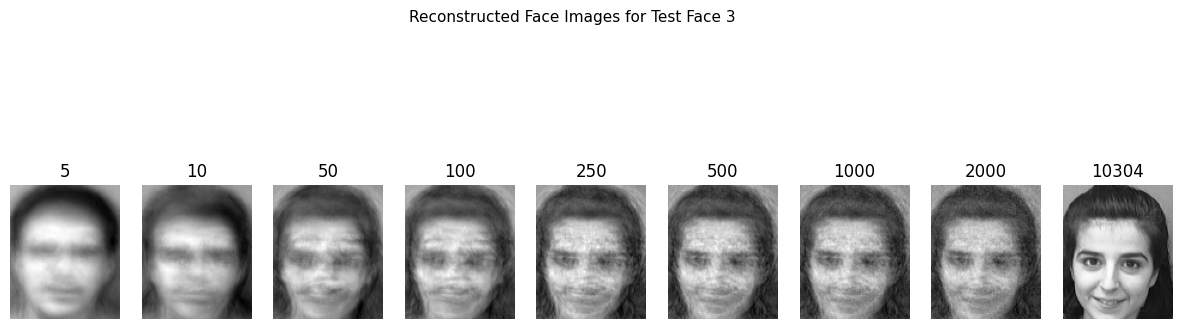

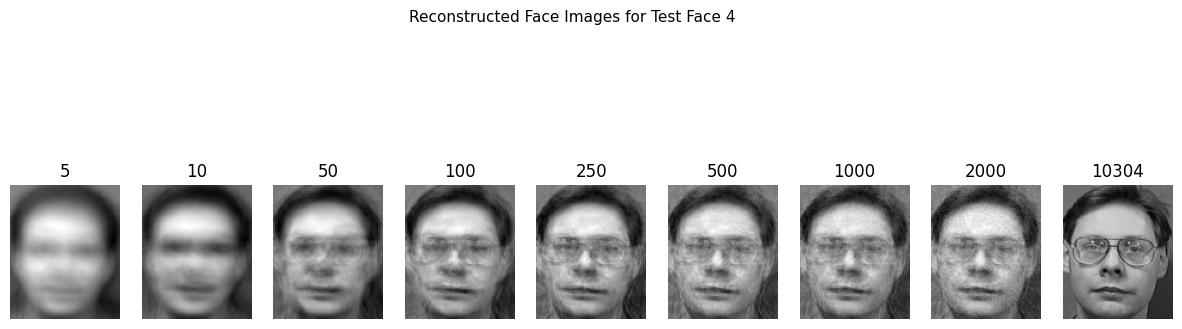

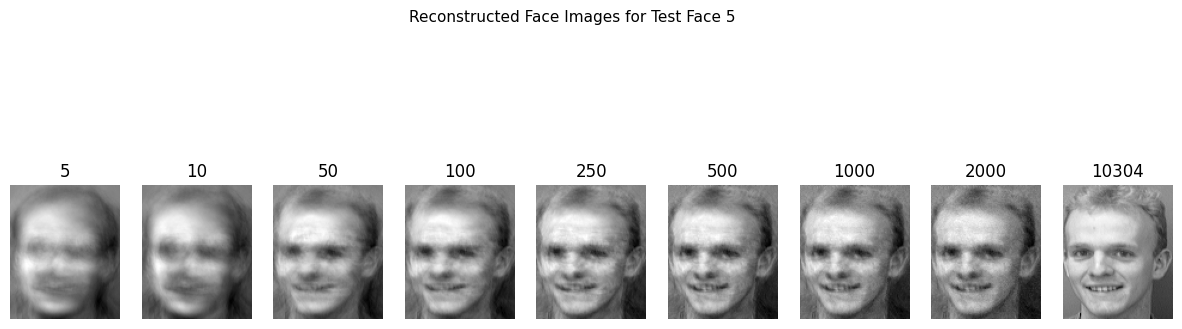

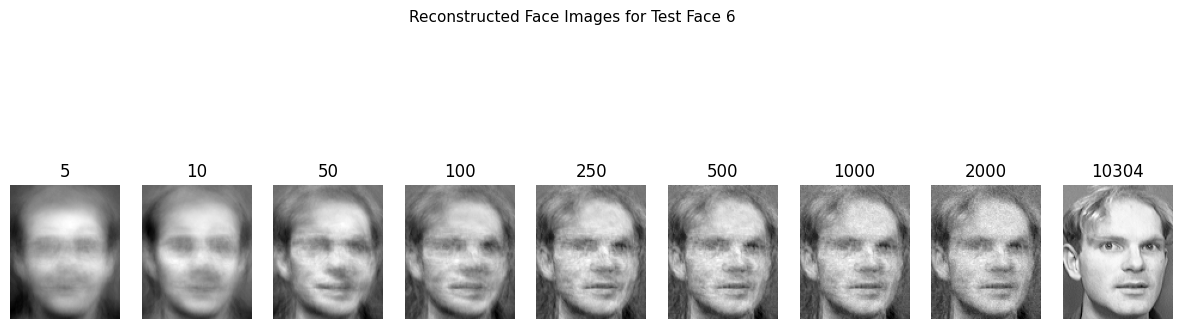

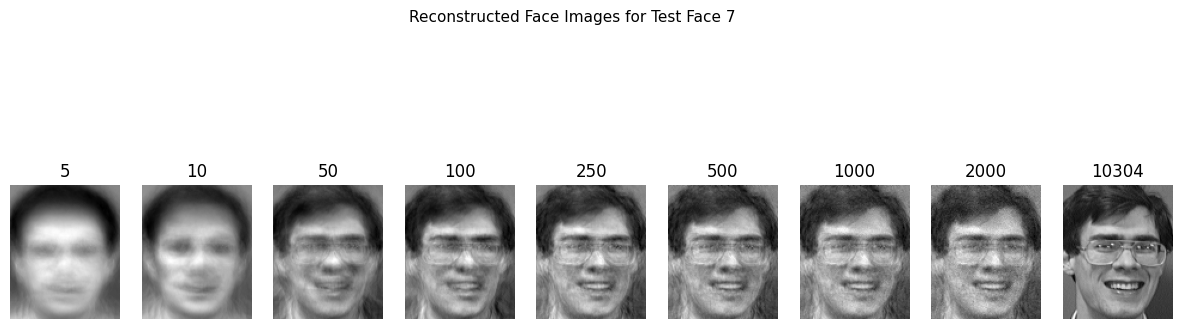

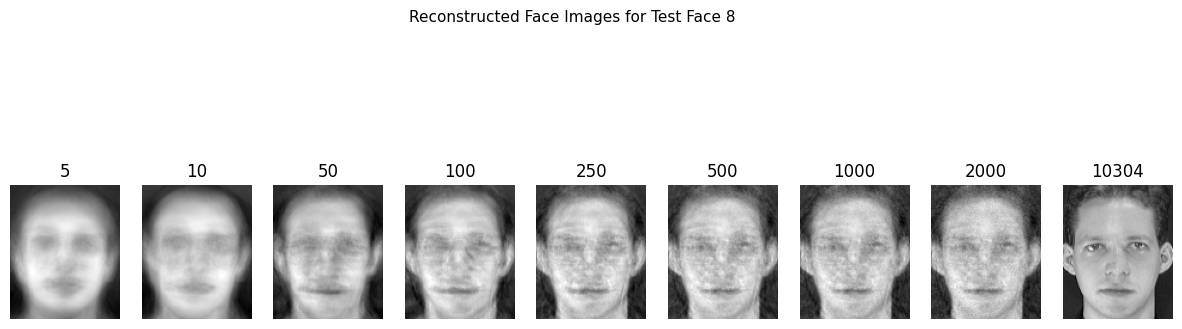

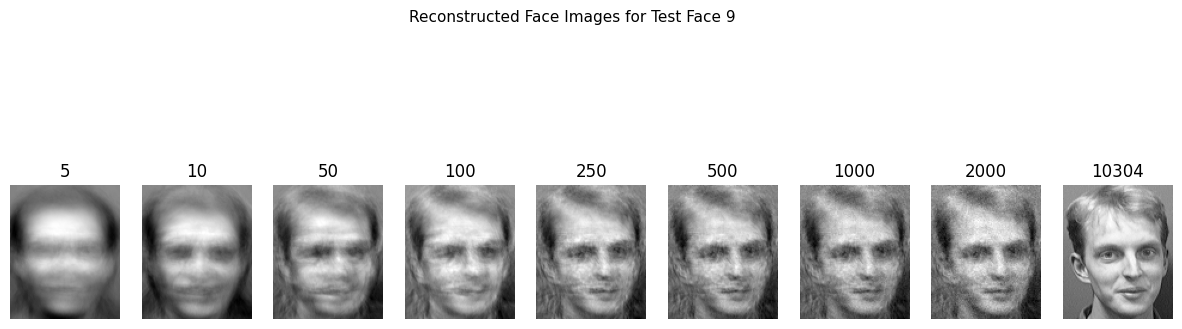

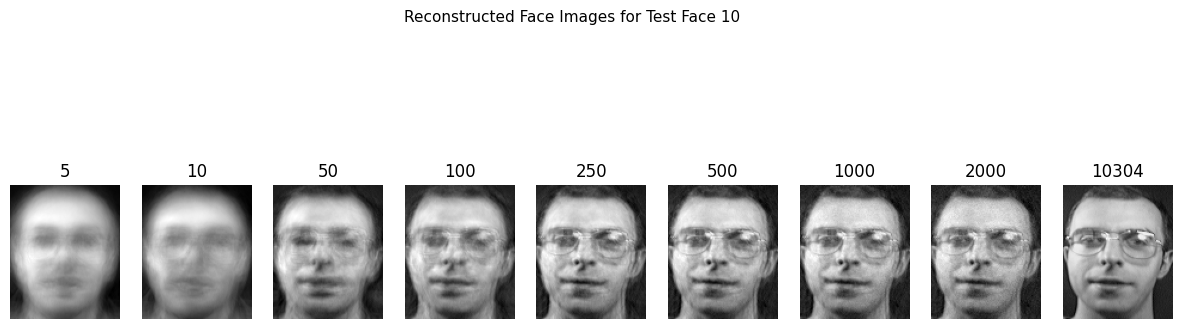

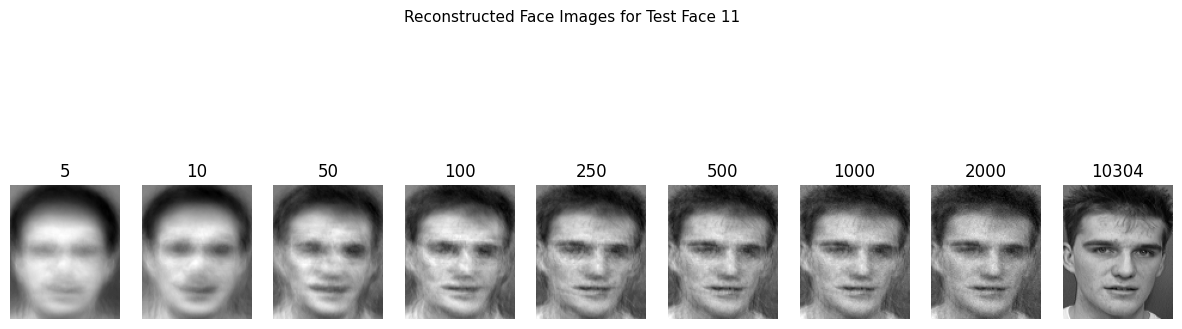

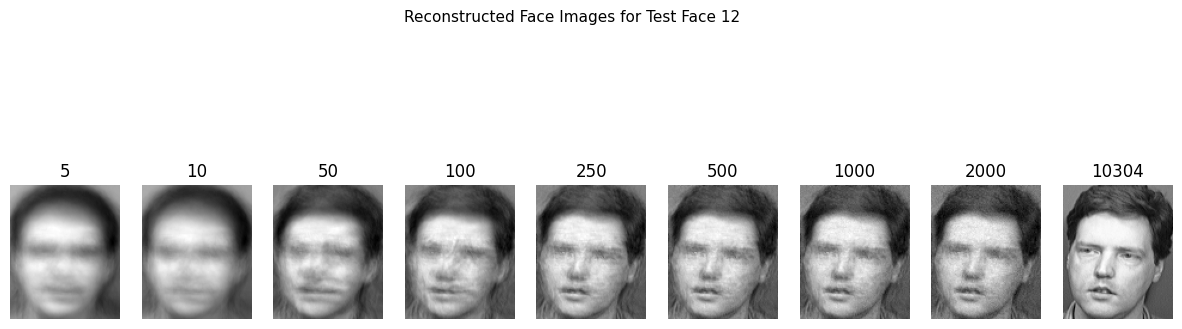

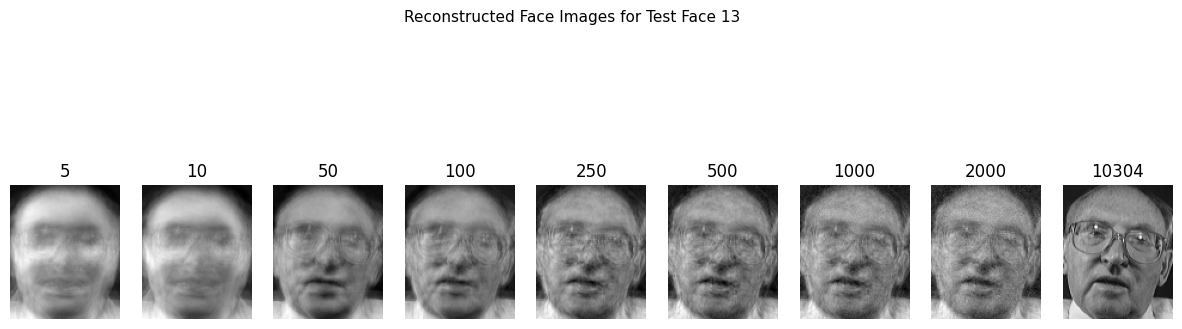

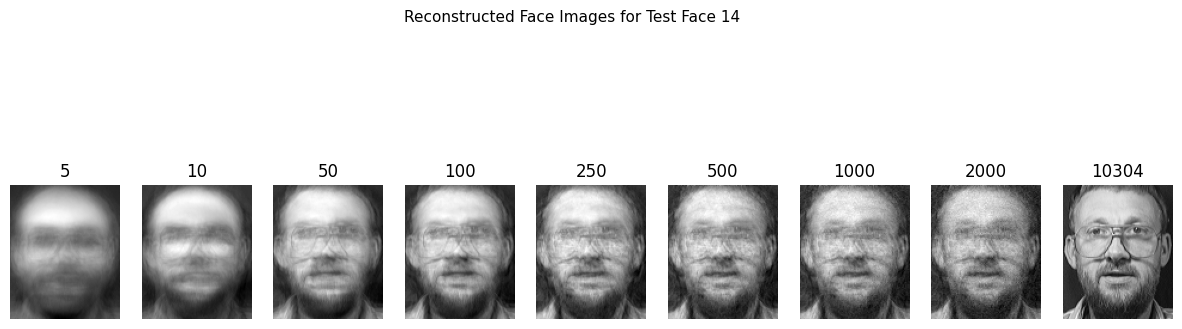

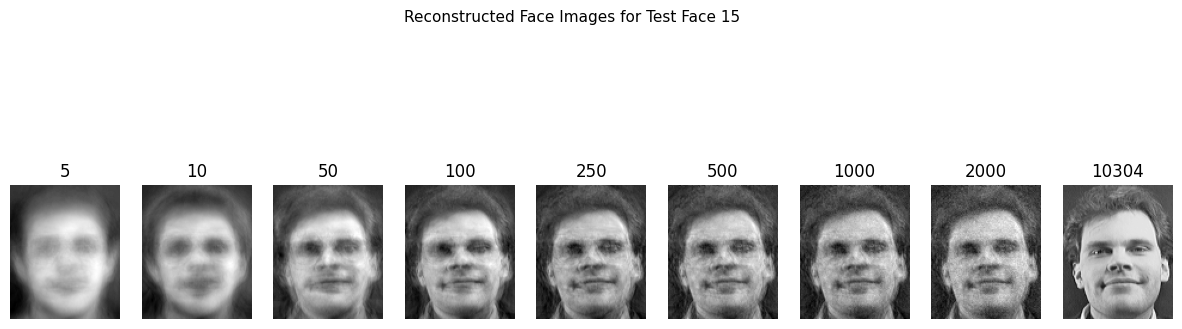

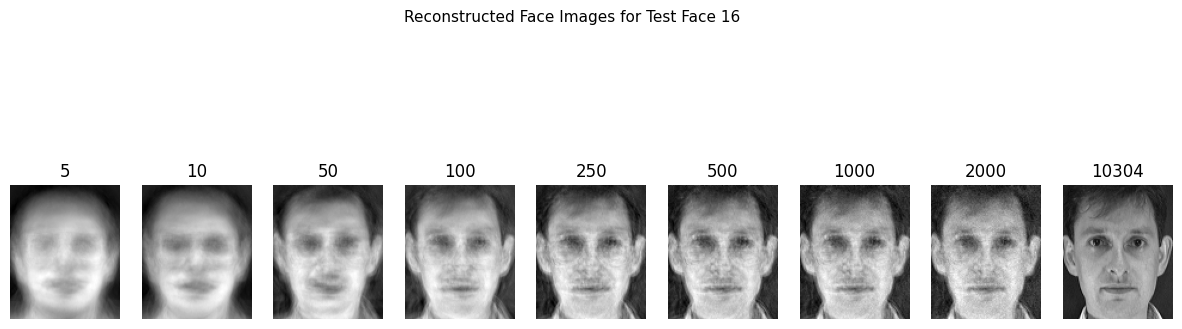

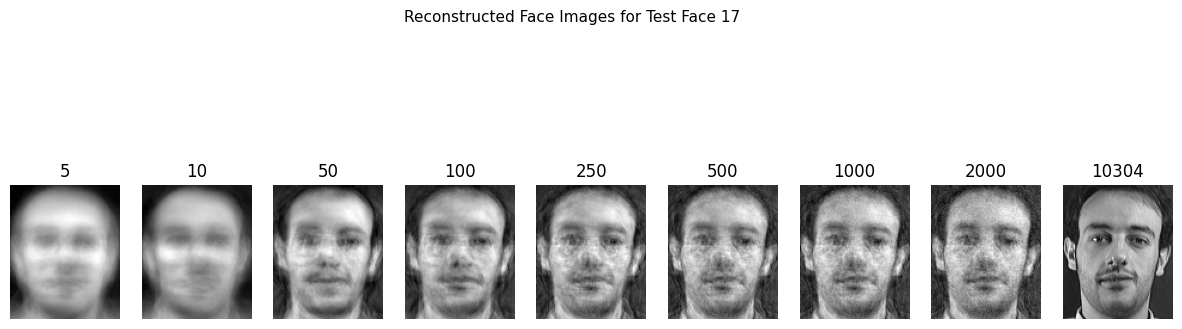

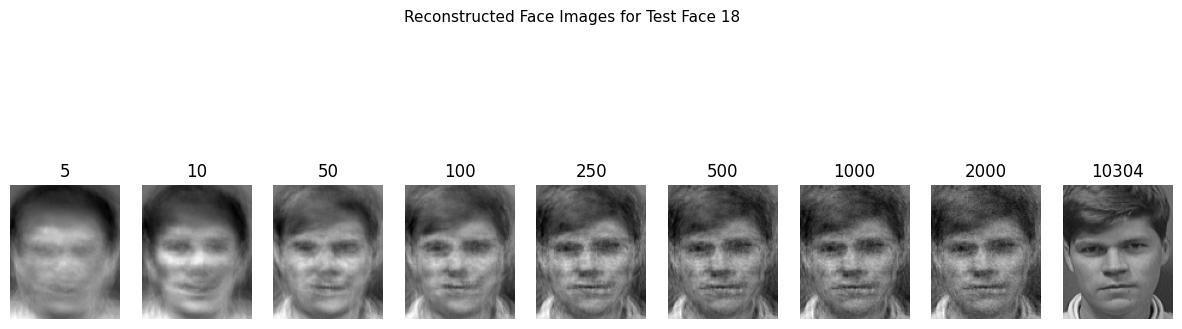

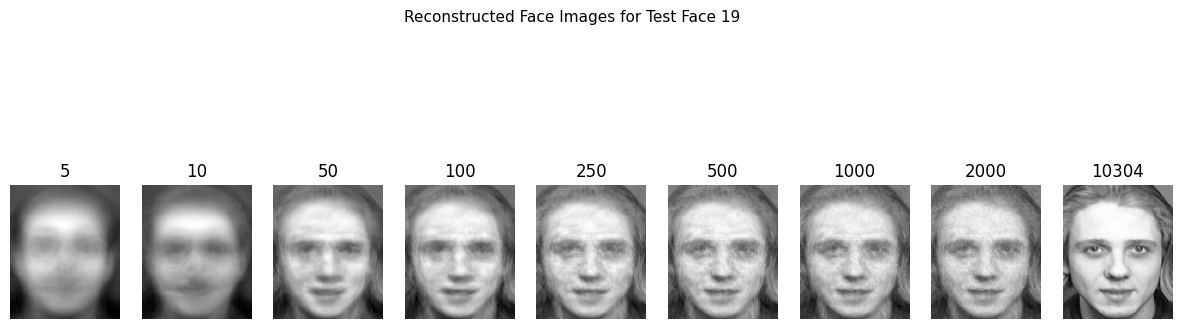

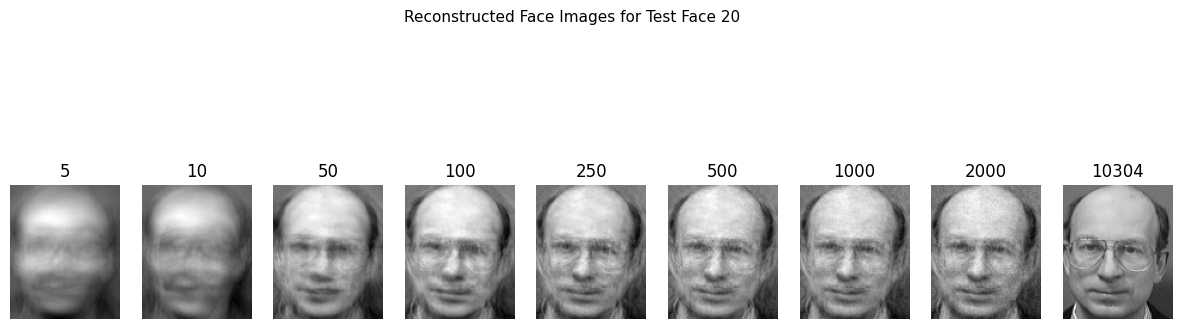

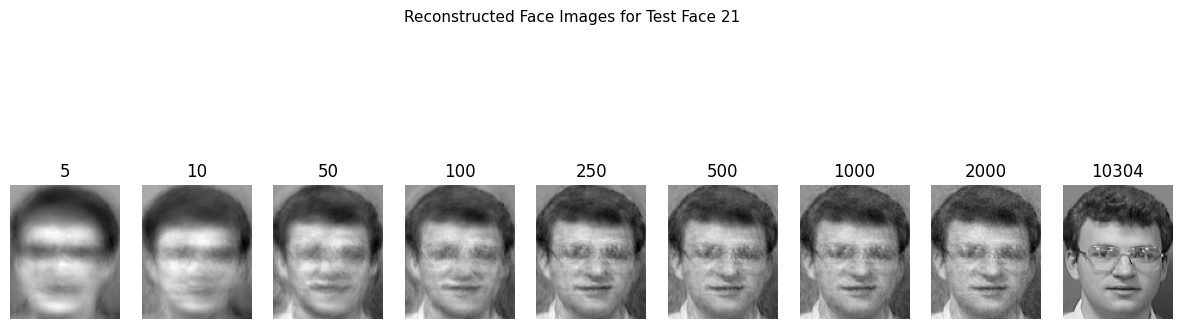

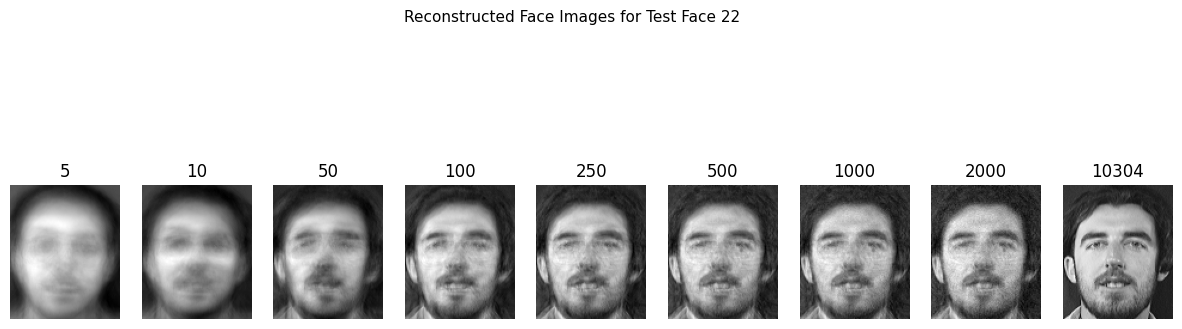

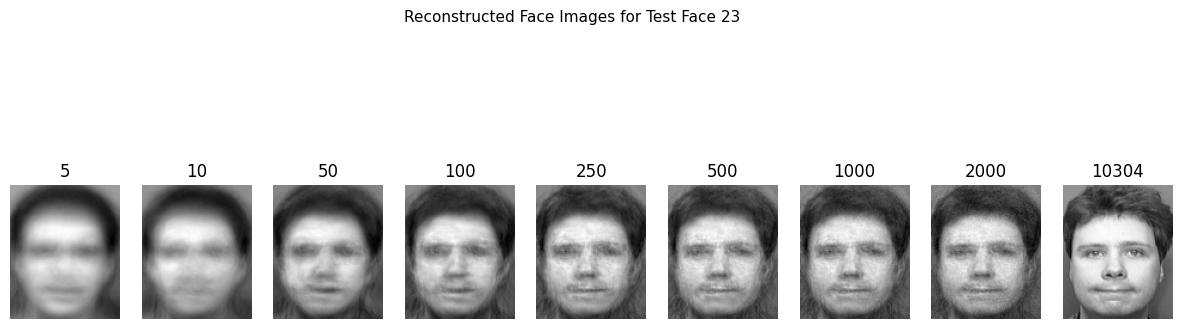

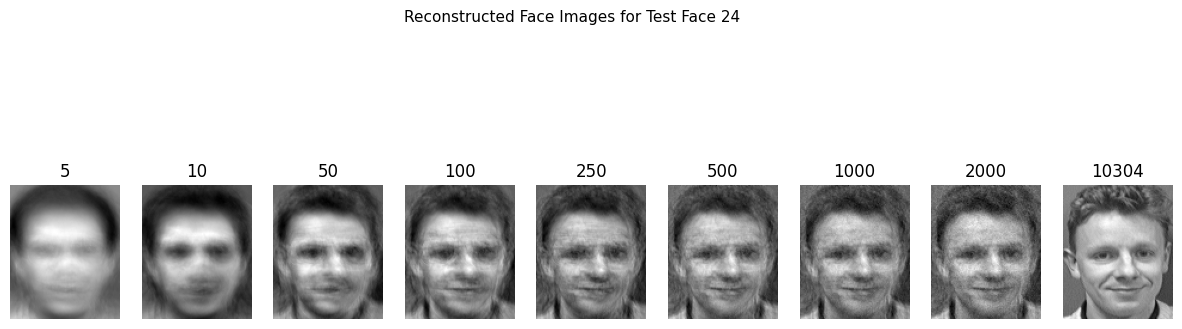

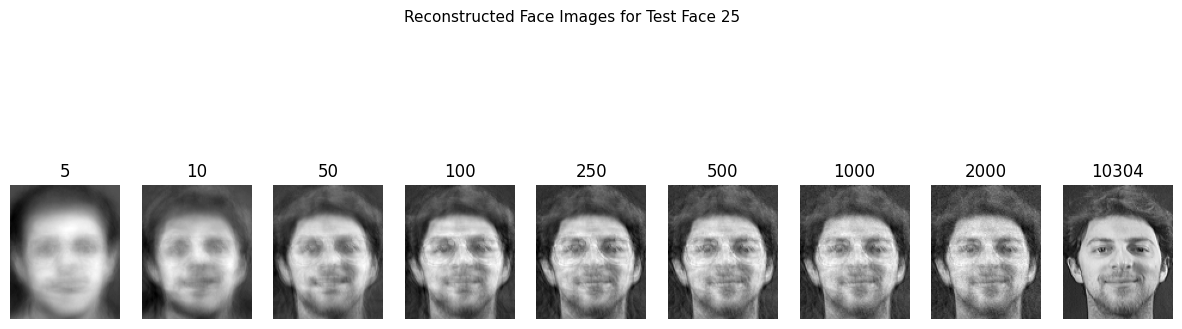

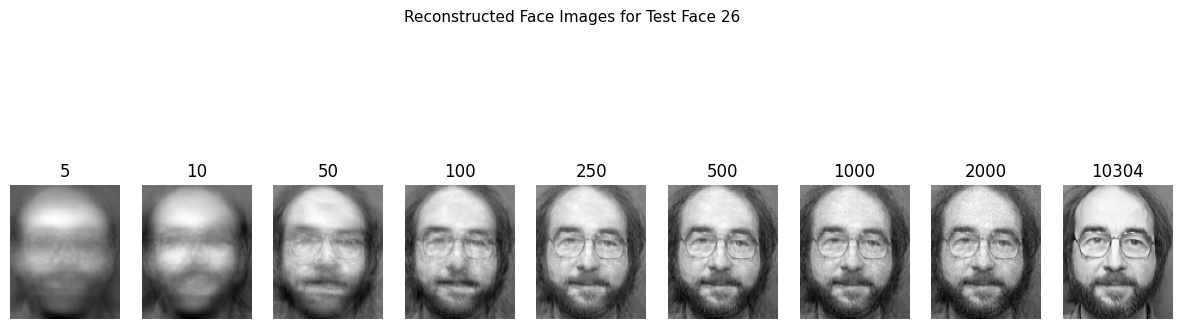

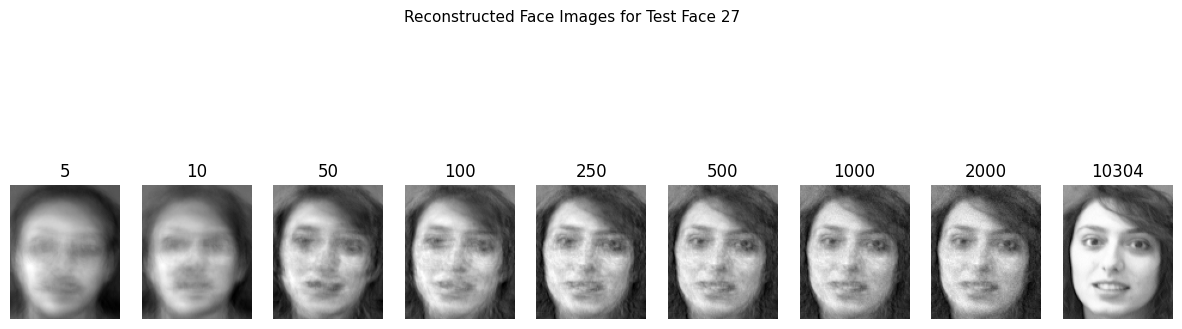

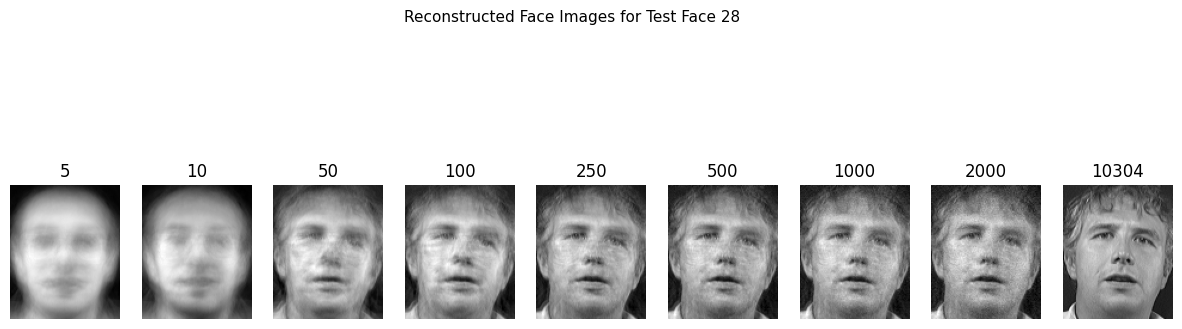

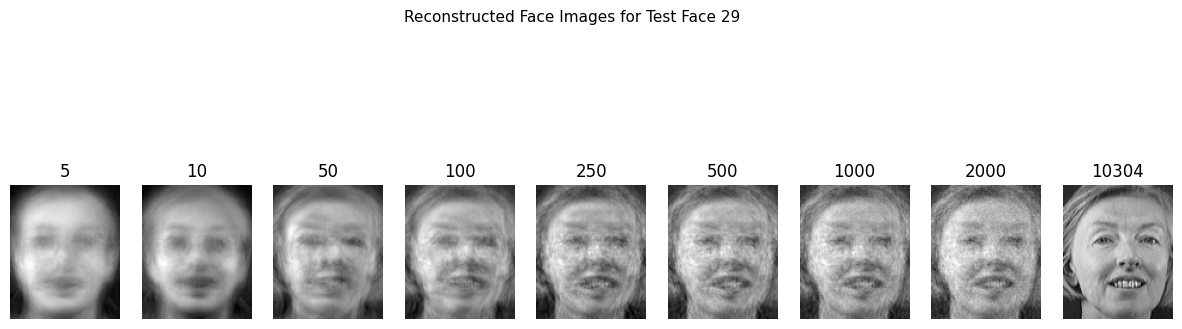

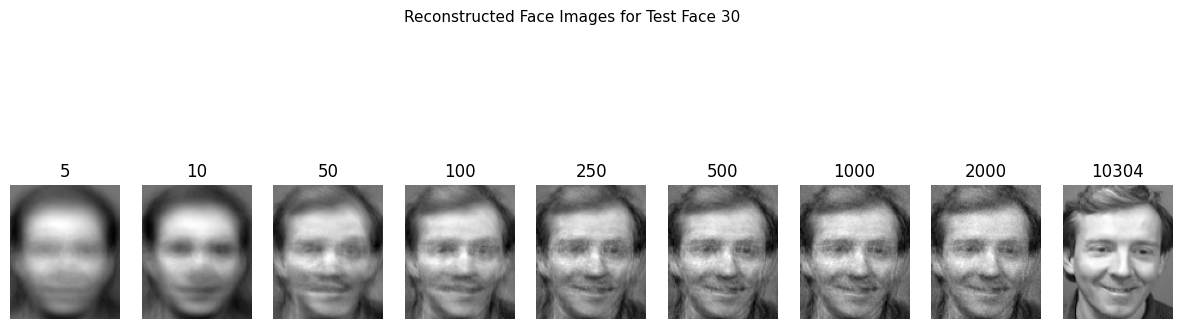

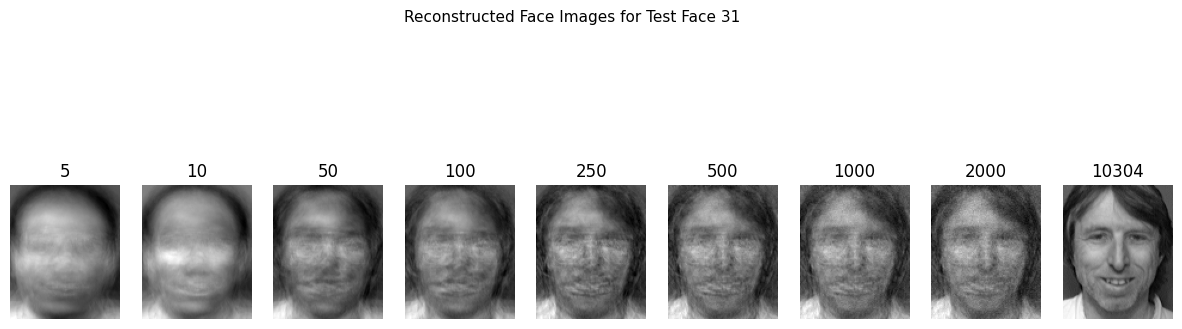

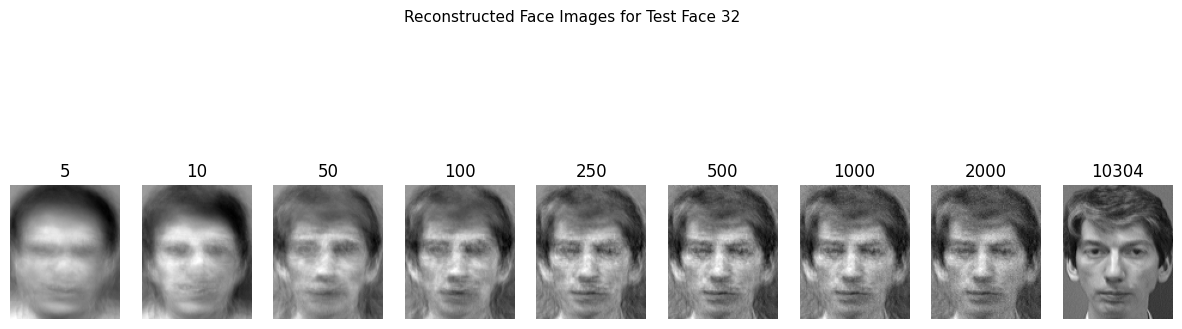

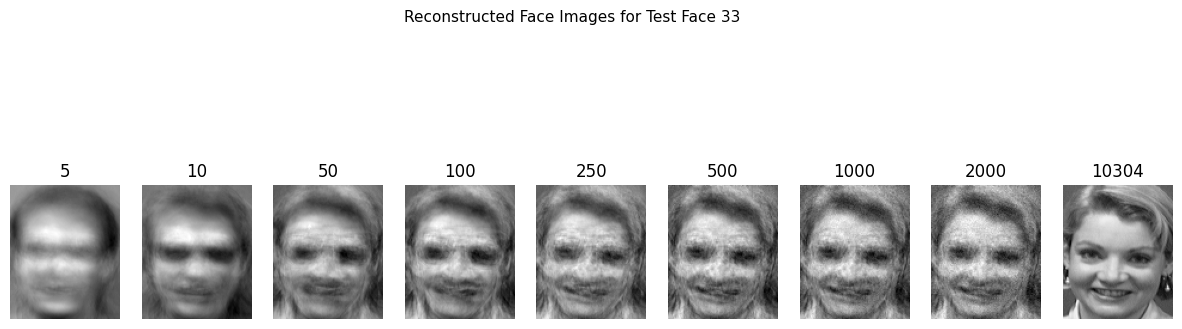

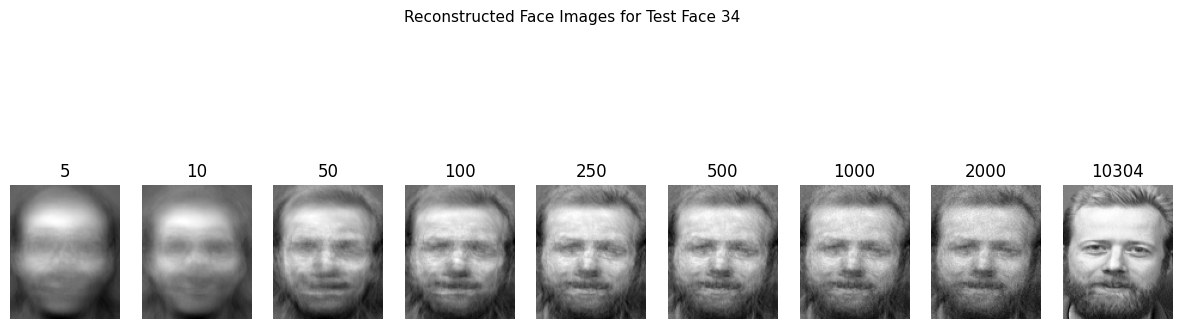

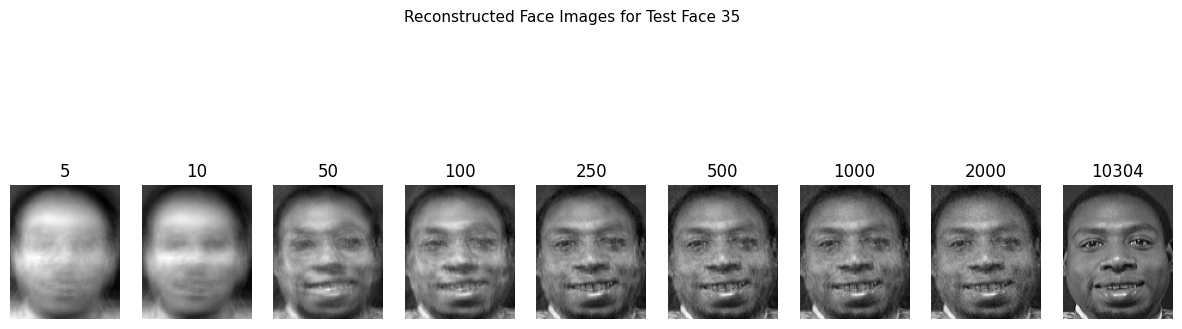

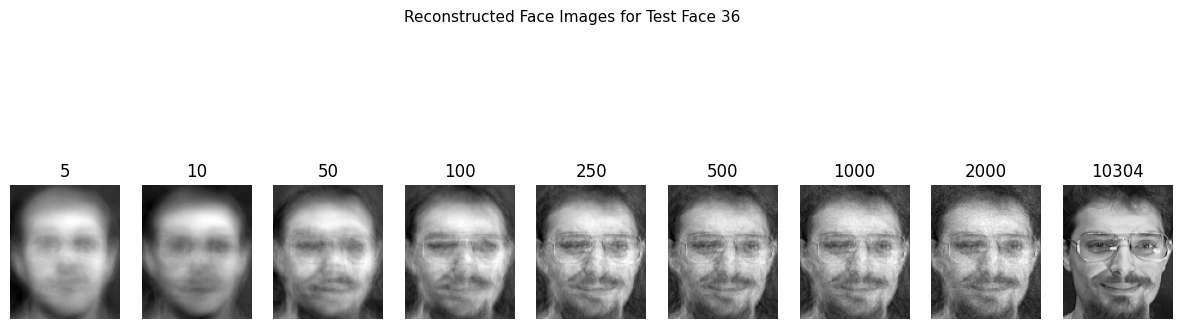

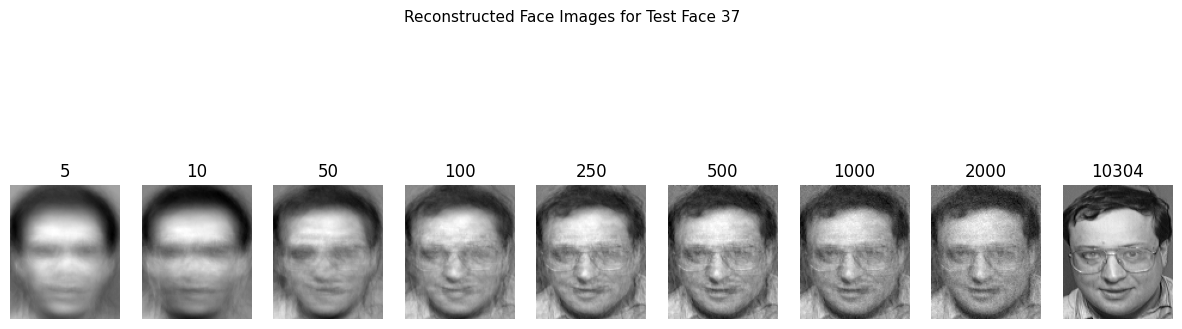

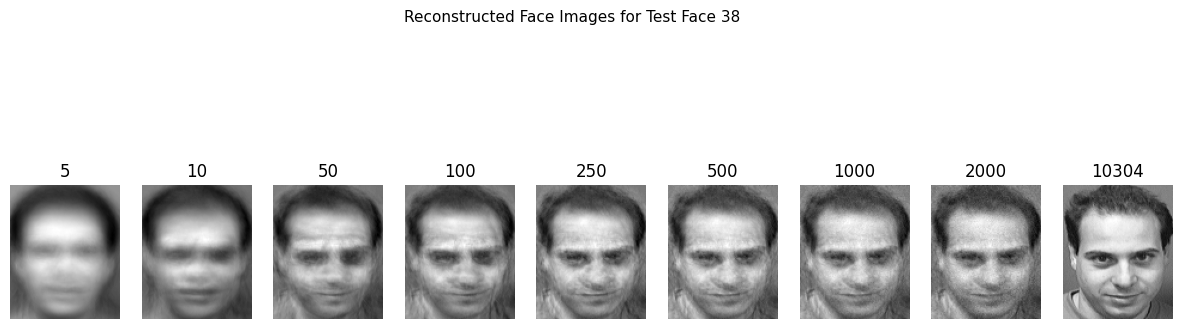

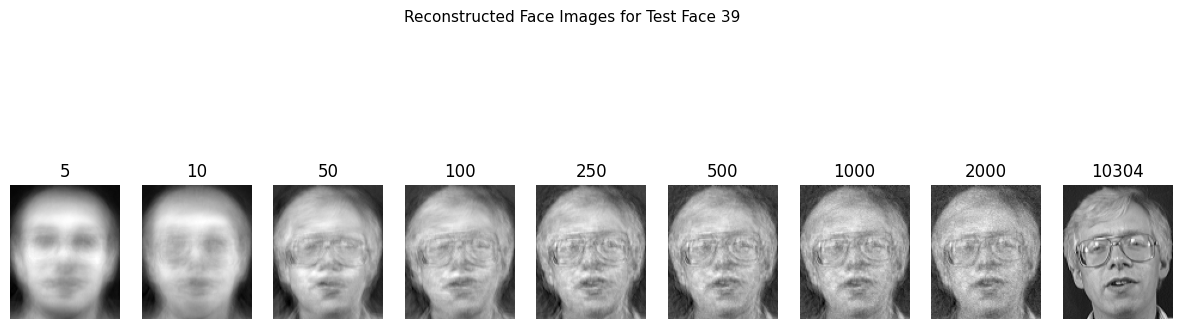

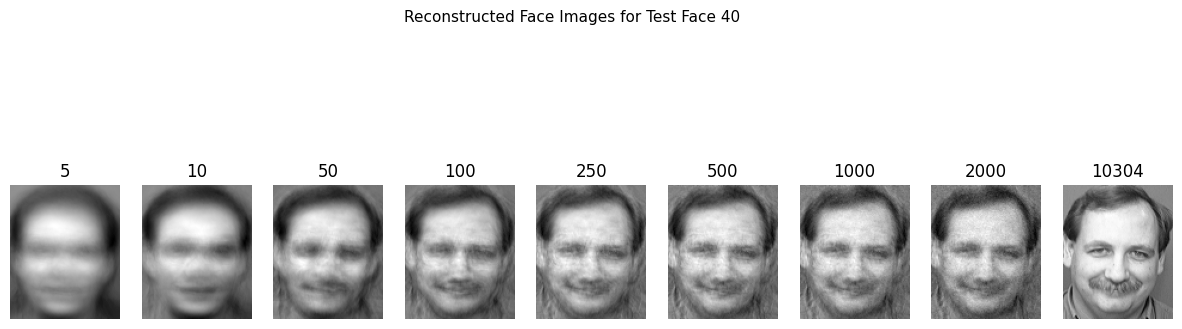

In [10]:
%matplotlib inline

number_of_components = [ 5, 10, 50, 100, 250, 500, 1000,2000, 10304]
# given list -p_components

# def displayNfactors():

    # your code here
for i in range(len(flat_testFaces)):
    fig, axes = plt.subplots(1, len(number_of_components), figsize=(15, 5))
    for idx, j in enumerate(number_of_components):
        top_k_elements = p_components[:, :j]
        reconstructed_img = imageReconstruction(flat_testFaces[i], top_k_elements, meanfaces)
        meanfaces_reshape = reconstructed_img.reshape([112, 92])

        axes[idx].imshow(meanfaces_reshape, cmap='gray')
        axes[idx].axis('off')
        axes[idx].set_title(f'{j}')

    plt.suptitle(f'Reconstructed Face Images for Test Face {i+1}', fontsize=11)
    plt.show()



    # return None

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [11]:
# def getClass():
#     """
#     Arguments:
#     1. Test image
#     2. Eigenvectors
#     3. Mean Eigen Face
#     4. Training Set(X_train,y_train)

#     The function must return the following:
#     1. image with smallest error
#     2. error value
#     3. prediction class
#     """

  # return None



In [12]:

def calculate_errors(flat_testFaces, p_components, meanfaces):
    """
    Calculate reconstruction errors for different numbers of components
    """
    components = [3, 5, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 10304]

    errors = []
    log_errors = []
    for i in range(len(flat_testFaces)):
        error = []
        log_error = []
        for j in components:  # Iterate over the components list
            top_k_elements = p_components[:, :j]
            reconstructed_img = imageReconstruction(flat_testFaces[i], top_k_elements, meanfaces)
            diff = reconstructed_img - flat_testFaces[i]
            sum_squared_diff = np.sqrt(np.sum(diff ** 2))
            error.append(sum_squared_diff / flat_testFaces[i].size)  # Mean squared error
            log_error.append(np.log(sum_squared_diff / flat_testFaces[i].size))  # Logarithmic Mean squared error

        errors.append(error)
        log_errors.append(log_error)
    return errors , log_errors


errors, log_errors = calculate_errors(flat_testFaces, p_components, meanfaces)


In [13]:
print(errors)
print(log_errors)

[[0.3127931783647326, 0.3001593239633194, 0.2694625155307233, 0.23460325287823192, 0.21399917839007587, 0.20409635061164325, 0.19758769023053452, 0.18674216193885051, 0.1741432465833583, 0.1654778274536785, 0.1629015627765617, 0.1552551872665634, 0.12228449730811722, 0.021349262570731213, 1.206524553787625e-15], [0.33564355857062, 0.2744770308486755, 0.24573474923386457, 0.2178401030716024, 0.20090075636653756, 0.18897763959328845, 0.17640760464504765, 0.1630276479015843, 0.15231907223641858, 0.14662294956103977, 0.14363580470404233, 0.13588219088109216, 0.10684272839150045, 0.019998977103547904, 1.1567175884831191e-15], [0.42758343524425835, 0.3859792198676759, 0.318295505839958, 0.2656827664545104, 0.24428593300177945, 0.23498775775883152, 0.22330740866572796, 0.20554484241630344, 0.1857650764147424, 0.16862544958320408, 0.1648141131952243, 0.1559666628230694, 0.12350456569842475, 0.02677254056853553, 1.4310156591608288e-15], [0.3034507988540397, 0.2837695725159696, 0.250669161479355

Iterate through all the images in the test data and test the accuracy by taking different number of components

In [14]:
def model (test_img, train_after_dot, y_train_img):

  distance = np.sqrt(np.sum((train_after_dot - test_img)**2, axis = 1))
  nearesr_img = np.argmin(distance)
  error=distance[nearesr_img]
  return nearesr_img,error,y_train_img[nearesr_img]

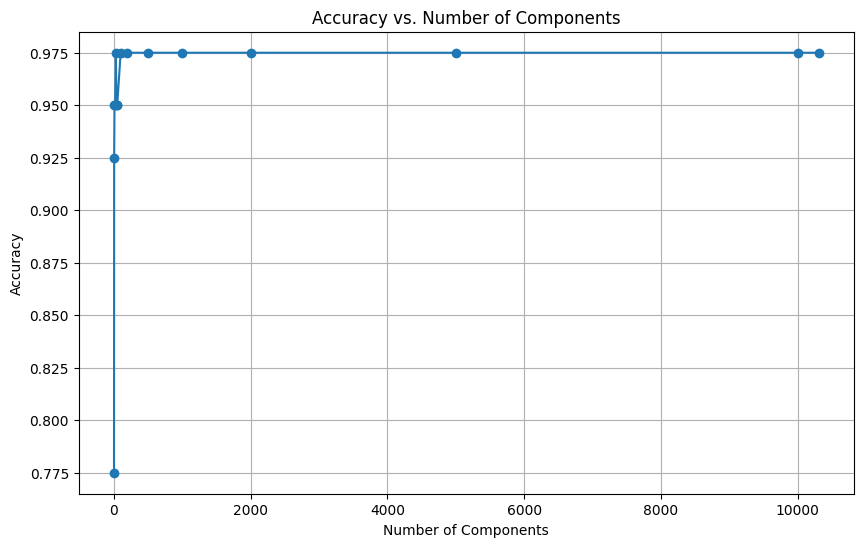

In [15]:
from sklearn.metrics import accuracy_score

components = [3, 5, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 10304]\
#  Evaluate performance (accuracy)

accr_arr=[]

for j in components:

  tmp_vec = p_components[:,:j]
  train_after_dot = np.dot(flat_trainFaces,tmp_vec)
  test_after_dot = np.dot(flat_testFaces,tmp_vec)

  y_pred=[]
  for test_img in test_after_dot:

    # print(test_img.shape)
    # print(train_after_dot.shape)
    img_pred, err, pred = model(test_img, train_after_dot, trainLabels)
    y_pred.append(pred)

  accr=accuracy_score(testLabels, y_pred)

  accr_arr.append(accr)


# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(components, accr_arr, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.grid(True)
plt.show()



Plot Number of eigenvectors vs Mean Square Error

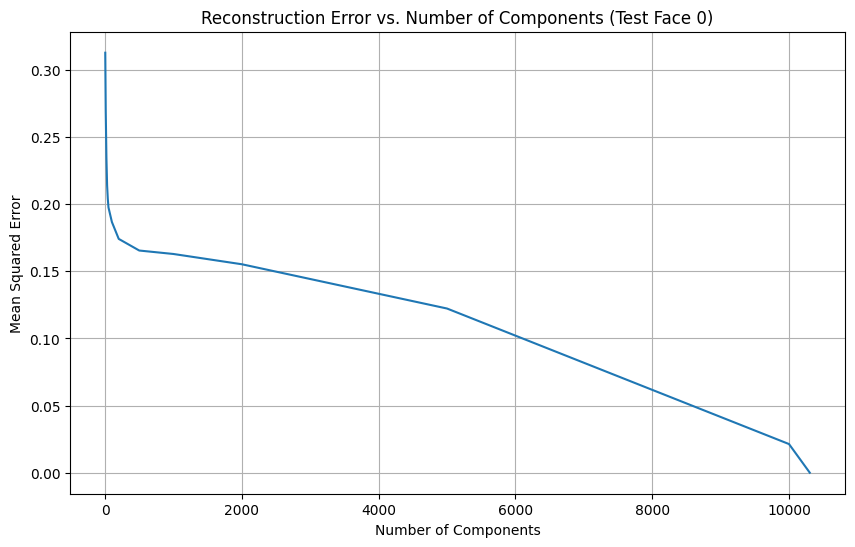

In [16]:
# Assuming you already have the 'errors' list calculated from your function
# Assuming you want to plot for test face 0

components = [3, 5, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 10304]
errors_test_face_0 = errors[0]  # Assuming errors[i] corresponds to test face 0

plt.figure(figsize=(10, 6))
plt.plot(components, errors_test_face_0)
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.title('Reconstruction Error vs. Number of Components (Test Face 0)')
plt.grid(True)
plt.show()


Plot Number of eigenvectors vs Logarithmic Mean Square Error

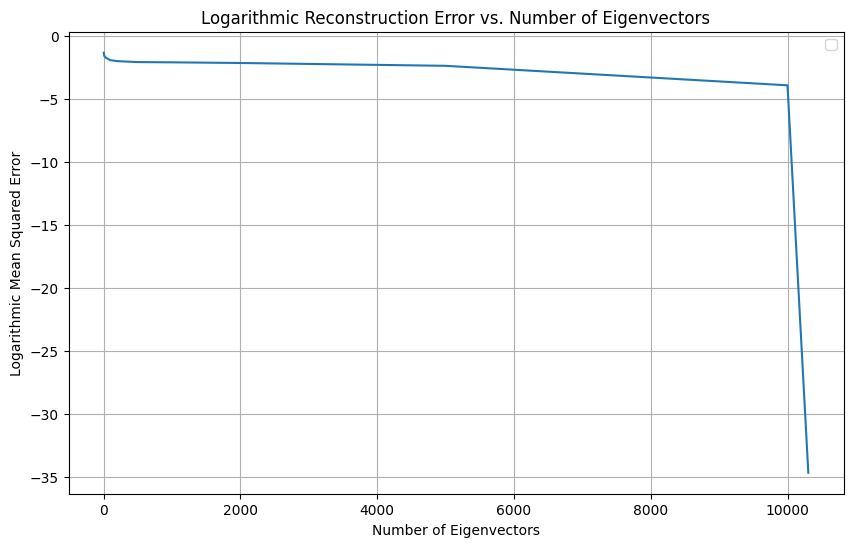

In [17]:
plt.figure(figsize=(10, 6))

log_err = log_errors[39]
plt.plot(components, log_err)

plt.xlabel('Number of Eigenvectors')
plt.ylabel('Logarithmic Mean Squared Error')
plt.title('Logarithmic Reconstruction Error vs. Number of Eigenvectors')
plt.legend()
plt.grid(True)
plt.show()